In [1]:
!pip install tabulate


# Quantum Speedup using Superposition

##Raghav Suri 2348543


## How does quantum computing differ from ..computing?

The fundamental difference between a regular computer and a quantum computer is the physics. A regular computer's bits can be in a state of 0 or 1. A quantum computer's *qubits* can be in a state of 0 and 1 simultaneously. We don't know the state of the qubit until we measure it (think Schrodinger's cat).

However, unlike schrodinger's cat, the qubit (qu-cat?) can be both dead and alive even after we open the box (or measure).

Measurement of a qubit *collapses* the qubit into 0 or 1 with a certain probability.

Let's write some code to represent a set of Qubits:

In [2]:
import math, random
from tabulate import tabulate

class QubitSet:

    def __init__(self, amplitudes):
        # The amplitude is an artifact from the wave nature of
        # quantum particles.
        self.amplitudes = amplitudes
        # Probability here is the likelihood of getting that
        # state when we measure the qubit. Probability and
        # amplitude obey the relation:
        # probability = amplitude².
        self.probabilities = list(map(
            lambda amplitude: math.pow(amplitude, 2), amplitudes))

    def numStates(self):
        return len(self.amplitudes)

    def pprint(self):
        tabular_data = []
        for i in range(self.numStates()):
            tabular_data.append([i, self.amplitudes[i],
                                 self.probabilities[i]])
        print(tabulate(tabular_data,
                       headers=['State', 'Amplitude', 'Probability']))

    def measure(self):
        # Simulate the measurement of a qubit state. When measured,
        # the state is returned with it's corresponding probability.
        return random.choices(range(self.numStates()),
                              weights=(self.probabilities), k=1)[0]

The `QubitSet` class above defines a set of quantum states, like a register of qubits.  

It's useful to think of a quantum state in terms of a probability distribution:

In [3]:
q = QubitSet([0, 1])
q.pprint()

  State    Amplitude    Probability
-------  -----------  -------------
      0            0              0
      1            1              1


When measured, `q` would be found in the `|1>` state with a probability of 1.

**Note**: Quantum states are represented by putting them between `|>`.

In [4]:
print("\nIs the cat dead or alive?\n")
for i in range(10):
    if q.measure():
        print("Alive :)")
    else:
        print("Dead  :x")


Is the cat dead or alive?

Alive :)
Alive :)
Alive :)
Alive :)
Alive :)
Alive :)
Alive :)
Alive :)
Alive :)
Alive :)


`q` here behaves exactly like a regular 1 bit. But we could do something more interesting with qubits!

In [5]:
realQ = QubitSet([0.6, 0.8])
realQ.pprint()
print("\nIs the qu-cat dead or alive?\n")
for i in range(10):
    if realQ.measure():
        print("Alive :)")
    else:
        print("Dead  :x")

  State    Amplitude    Probability
-------  -----------  -------------
      0          0.6           0.36
      1          0.8           0.64

Is the qu-cat dead or alive?

Dead  :x
Dead  :x
Dead  :x
Dead  :x
Alive :)
Alive :)
Dead  :x
Alive :)
Alive :)
Dead  :x


**Note**: No cats or qu-cats were harmed while writing this article.

It's not a coincidence that the probabilities of both states sum upto 1. It's a requirement, since the qubit can only be found in one of the 2 states after measurement.

We can observe that a qubit actually captures 2 regular states (0, 1). This can be extended to show that an n-qubit quantum state captures 2ⁿ regular states. This property of qubits is known as **superposition**.

The physics of a qubit allow it to remain in superposition of it's individual states, while a regular bit cannot **stably** stay in a superposed state.


> **All quantum algorithms leverage superposition to operate on multiple quantum states in parallel to achieve speedup.**



Another interesting property of qubits is their ability to **interfere**. When we combine two qubits (using a quantum gate), they may interfere *constructively* or *destructively*.

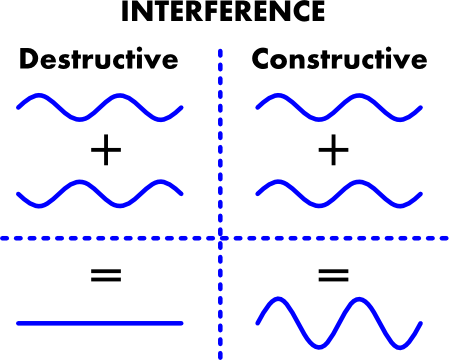

> It's easier to understand interference by considering qubits as waves.

In order to form an intuition for qubit interference, let's consider a coin flip experiment. For a typical coin, the probability of getting a heads or tails on a flip is 1/2.   

Now let's consider a quantum coin. Let's say we begin with the coin facing heads up.

In [6]:
# Here |0> represents head, and |1> represents tail
initialState = QubitSet([1, 0])
initialState.pprint()

  State    Amplitude    Probability
-------  -----------  -------------
      0            1              1
      1            0              0


We flip the coin by applying a quantum gate (similar to logic gates) called [Hadamard](https://en.wikipedia.org/wiki/Quantum_logic_gate#Hadamard_(H)_gate). The Hadamard gate brings the coin into a uniform superposition state (all outcomes are measured with equal probability).

In [7]:
def hadamard2InputStates(qubitSet):
    assert(qubitSet.numStates() == 2)
    one_over_root_2 = 1/math.pow(2, 1/2)
    return QubitSet([one_over_root_2*qubitSet.amplitudes[0] +
                     one_over_root_2*qubitSet.amplitudes[1],
                     one_over_root_2*qubitSet.amplitudes[0] -
                     one_over_root_2*qubitSet.amplitudes[1]])

In [8]:
firstHadamard = hadamard2InputStates(initialState)
firstHadamard.pprint()

  State    Amplitude    Probability
-------  -----------  -------------
      0     0.707107            0.5
      1     0.707107            0.5


So far the quantum coin behaves exactly like a regular coin.

But when we flip the coin again by applying the same Hadamard gate, we notice something different:

In [9]:
secondHadamard = hadamard2InputStates(firstHadamard)
secondHadamard.pprint()

  State    Amplitude    Probability
-------  -----------  -------------
      0            1              1
      1            0              0


The coin always flips to head!

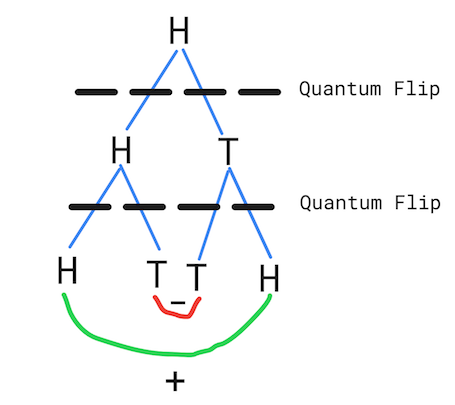

Since we started from the `H` state we don't notice any interference after the first flip. But when we flip the superposed state, the resulting `T` states interfere negatively, while the `H` states interfere positively. Resulting in the end state always being `H`.

Now that we understand both **superposition** and **interference**, we're ready to understand how (most) quantum algorithms work!

## What does a quantum algorithm look like?

A typical quantum algorithm works in the following way:  

* Put the input qubits into a uniform superposed state.
* Apply quantum gates causing the states to interfere, transforming the amplitudes (and therefore the probabilities) of the qubits to our desired state.
* Measure the output qubits (collapsing the qubit into a regular bit).

For the purpose of this article, we will consider [Grover's search algorithm](https://en.wikipedia.org/wiki/Grover%27s_algorithm).

Grover's algorithm is a quantum take on linear search - finding an element in a list of `n` unsorted elements.

In the regular linear search algorithm, we need to go through n-1 elements in the worst case before we find the element, meaning O(n) worst case time. However, using Grover's search algorithm we can find the element in O(√n) time (with a high probability).

So how exactly does Grover's algorithm achieve this speedup?

## Grover's search algorithm

Here's the implementation of the algorithm, we'll then split it up and look into how it works.

In [10]:
class GroverSearch:

    def __init__(self, inputList, answerIndex):
        self.inputList = inputList
        self.answerIndex = answerIndex

    def oracle(self, guess):
        return guess == self.answerIndex

    def groverSeparationGate(self, qubitSet):
        transformedAmplitudes = []
        for state, amplitude in enumerate(qubitSet.amplitudes):
            transformedAmplitudes.append(
                -1*amplitude if self.oracle(state) else amplitude)
        return QubitSet(transformedAmplitudes)

    def meanInversionGate(self, qubitSet):
        transformedAmplitudes = []
        mean = sum(qubitSet.amplitudes)/qubitSet.numStates()
        return QubitSet([2*mean-amplitude for
                         amplitude in qubitSet.amplitudes])

    def search(self):
        listLen = len(self.inputList)
        assert(isPowerOfTwo(listLen))
        initState = [0]*listLen
        initState[0] = 1
        uniformSuperposition = hadamard(QubitSet(initState))
        inputState = uniformSuperposition
        for i in range(math.ceil(math.sqrt(listLen)) - 1):
            inputState = self.groverSeparationGate(inputState)
            inputState = self.meanInversionGate(inputState)
        return inputState

Let's consider a 4 element list `[0, 1, 2, 3]`. And let's say that the element we're searching for is `2`.

In [11]:
groverSearch = GroverSearch([0, 1, 2, 3], 2)

To analyze Grover's algorithm, let's consider an oracle. We guess an element in the list, and the oracle tells us if the guess is correct.

In [12]:
def oracle(self, guess):
        return guess == self.answerIndex

You might ask - why bother with searching the list if we already know the answer. We'll look at more interesting cases where the oracle is not as simple in the subsequent section.  

In the linear search algorithm, we care about the input. We ask the question:

> What input can I pick so the oracle responds with true?

In Grover's algorithm, we don't care about the input (we can start from any state). We ask a different question:

> How do I use the oracle to increase the probability of the answer state from the set of all possible input states?

This change of question, also called [change of basis](https://en.wikipedia.org/wiki/Change_of_basis), is enabled by superposition.

To simulate such a change of question using a regular bit, for an n-bit qubit, we'd require O(2ⁿ) iterations to generate and O(2ⁿ) space to store the generated state.  
An n-qubit quantum state can be put into a superposed state in O(1) time using O(1) space with the Hadamard gate we used above.

Grover's search algorithm begins with the `|0>` state.

In [13]:
initState = [0]*4
initState[0] = 1
initQuantumState = QubitSet(initState)
initQuantumState.pprint()

  State    Amplitude    Probability
-------  -----------  -------------
      0            1              1
      1            0              0
      2            0              0
      3            0              0


It then uses the hadamard gate to put the input into a state of uniform superposition.

In [14]:
def hadamard4InputStates(qubitSet):
    assert(qubitSet.numStates() == 4)
    return QubitSet([1/2*qubitSet.amplitudes[0] +
                     1/2*qubitSet.amplitudes[1] +
                     1/2*qubitSet.amplitudes[2] +
                     1/2*qubitSet.amplitudes[3],
                     1/2*qubitSet.amplitudes[0] -
                     1/2*qubitSet.amplitudes[1] +
                     1/2*qubitSet.amplitudes[2] -
                     1/2*qubitSet.amplitudes[3],
                     1/2*qubitSet.amplitudes[0] +
                     1/2*qubitSet.amplitudes[1] -
                     1/2*qubitSet.amplitudes[2] -
                     1/2*qubitSet.amplitudes[3],
                     1/2*qubitSet.amplitudes[0] -
                     1/2*qubitSet.amplitudes[1] -
                     1/2*qubitSet.amplitudes[2] +
                     1/2*qubitSet.amplitudes[3]])

uniformSuperposition = hadamard4InputStates(initQuantumState)
uniformSuperposition.pprint()

  State    Amplitude    Probability
-------  -----------  -------------
      0          0.5           0.25
      1          0.5           0.25
      2          0.5           0.25
      3          0.5           0.25


We need a way to separate the `|2>` state (our answer) from the other input states. The oracle comes to our rescue!

Grover's algorithm constructs a quantum gate (groverSeparationGate) that operates on the superposed state to do this separation:

In [15]:
def groverSeparationGate(self, qubitSet):
        transformedAmplitudes = []
        for state, amplitude in enumerate(qubitSet.amplitudes):
            transformedAmplitudes.append(
                -1*amplitude if self.oracle(state) else amplitude)
        return QubitSet(transformedAmplitudes)

In [16]:
separatedQuantumState = groverSearch.groverSeparationGate(uniformSuperposition)
separatedQuantumState.pprint()

  State    Amplitude    Probability
-------  -----------  -------------
      0          0.5           0.25
      1          0.5           0.25
      2         -0.5           0.25
      3          0.5           0.25


**Note**: It may appear that we're dealing with O(N) complexity based on the code. However, to a quantum gate, a superposed state is no different than an un-superposed state. An n-qubit quantum gate operates on the n-qubit *state* in O(1) time. It helps to think of the quantum gates as operating on all the states in a superposition in parallel. So in practice, the groverSeparationGate operation takes O(1) time.

Note that the Grover's separation gate doesn't change the probability of the states. This is not a coincidence. A quantum gate can only do a [*unitary* transformation](https://en.wikipedia.org/wiki/Unitary_transformation). A unitary transformation preserves the total probability of the input states. This makes sense since we only expect to find one of `[0, 1, 2, 3]`, therefore their probabilities should sum to `1`.

Now we need a way to increase the probability of state `|2>`. Grover's algorithm uses *mean inversion* to achieve this. Mean inversion inverses the amplitudes about their mean.

In [17]:
def meanInversionGate(self, qubitSet):
        transformedAmplitudes = []
        mean = sum(qubitSet.amplitudes)/qubitSet.numStates()
        return QubitSet([2*mean-amplitude for amplitude in qubitSet.amplitudes])

In [18]:
groverSearch.meanInversionGate(separatedQuantumState).pprint()

  State    Amplitude    Probability
-------  -----------  -------------
      0            0              0
      1            0              0
      2            1              1
      3            0              0


In this case we reached our answer with a probability of 1 with just 1 application of the groverSeparation gate and the meanInversion gate!

But in general, each application of the separation and mean reversal gates increases the amplitude of our answer state by c/√n, where c is a constant. Therefore we need √n iterations to increase the probability of finding the answer to a constant factor.

So the Grover's search algorithm looks like this:

In [19]:
def search(self):
    listLen = len(self.inputList)
    assert(isPowerOfTwo(listLen))
    initState = [0]*listLen
    initState[0] = 1
    uniformSuperposition = hadamard(QubitSet(initState))
    inputState = uniformSuperposition
    for i in range(math.ceil(math.sqrt(listLen)) - 1):
        inputState = self.groverSeparationGate(inputState)
        inputState = self.meanInversionGate(inputState)
    return inputState

The time complexity of the Grover separation gate is O(1). The time complexity of the mean inversion gate is O(1) too. So the overall time complexity of Grover's algorithm is O(√N), which is a quadratic speedup over the regular O(N) algorithm.

## What does this speedup mean?

If we think of our search problem as searching a database for an element, the oracle is an encoding of the database itself. Clearly we need at least O(N) additional work to build the oracle based on the database. What's the point of Grover's algorithm, if we need to spend at least O(N) time building the oracle from the database anyway?

The real power of Grover's algorithm lies in the nature of the oracle. Notice how Grover's algorithm always guarantees to find the solution in O(√N) iterations regardless of what the oracle is. What if the oracle was not a simple `=` checker, but something more complex?

The NP complete problems come to mind. A problem is said to be in NP if there's a polynomial time algorithm to verify a solution to the problem.

> **We can build an oracle using the verification algorithm. And use Grover's algorithm to find a solution to the problem in O(√N) iterations!**

However, note that this doesn't mean *P = NP*. We only achieved a quadratic speedup. So if we needed 2ⁿ iterations to find a solution to the problem earlier, we now require √2ⁿ iterations. But we still require an **exponential** number of iterations.

Also, with the current state of quantum computers, we're restricted to [53 qubits](https://www.cnet.com/news/ibm-new-53-qubit-quantum-computer-is-its-biggest-yet/). So there's that.

But this is just the beginning for quantum computing!

## Conclusion

This article is intended as an introduction to quantum algorithms:
* We implemented a simulation of qubits and quantum gates.
* We implemented Grover's search algorithm using our simulated qubits and quantum gates.
* We observed how Grover's algorithm leverages qubit **superposition** and **interference** to achieve a quadratic speedup over the classical linear search algorithm.